In [2]:
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set()  # this makes plots pretty. but it also makes histograms confusing
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import cross_validation as cv
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from skll import metrics
from sklearn.metrics import roc_auc_score, make_scorer

import data_utils

In [4]:
train_init = pd.read_csv('../../data/train.csv')
test_init = pd.read_csv('../../data/test.csv')

In [5]:
constant_cols = (train_init.columns[train_init.max() == train_init.min()])

In [4]:
train = train_init.drop(constant_cols, axis=1).drop(['ID'], axis=1)
test = test_init.drop(constant_cols, axis=1)

In [6]:
train_neg = train.loc[train.TARGET==0].drop(['TARGET'], axis=1)
train_pos = train.loc[train.TARGET==1].drop(['TARGET'], axis=1)

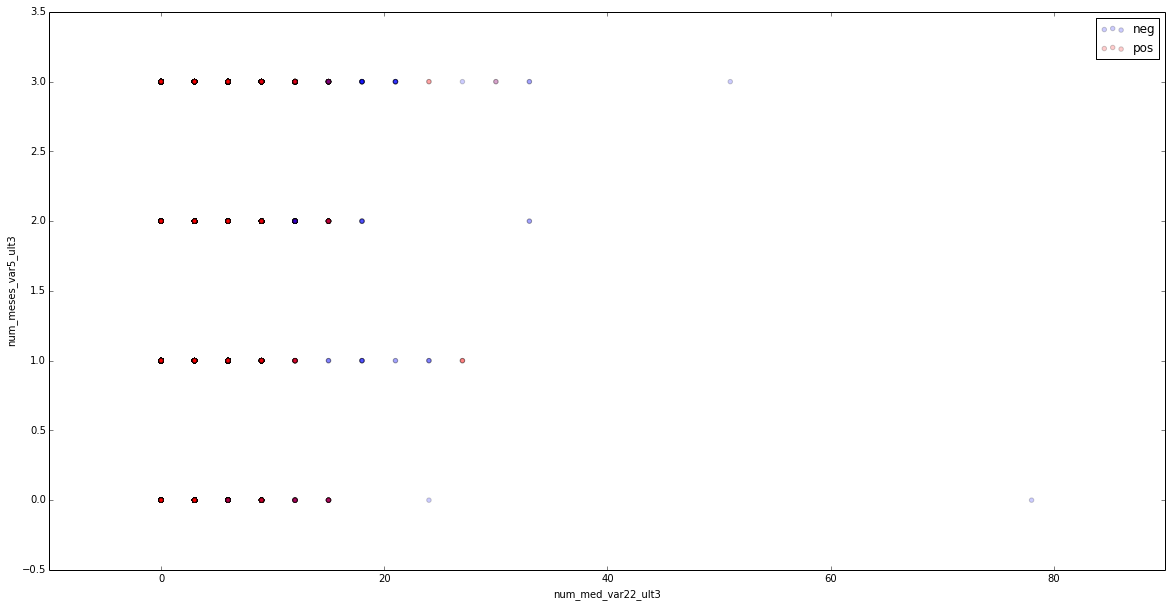

In [7]:
plt.figure(figsize=(20,10))
var_x = 'num_med_var22_ult3'
var_y = 'num_meses_var5_ult3'
plt.scatter(x=train_neg[var_x], y=train_neg[var_y], alpha=0.2, label="neg", c='b')
plt.scatter(x=train_pos[var_x], y=train_pos[var_y], alpha=0.2, label="pos", c='r')
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend()

In [11]:
# Might be a good start to find features that have no difference between TARGET=0 and TARGET=1
epsilon = 1.001
useless_cols = []
for c in train_pos.columns:
    ratio = (np.abs(train_neg[c].mean()) + 1) / (np.abs(train_pos[c].mean()) + 1)
    if ratio < epsilon and ratio > (1/epsilon):
        useless_cols.append(c)
print("Found %i features where neg and pos examples have about the same mean." % len(useless_cols))

Found 55 features where neg and pos examples have about the same mean.


In [ ]:
X = train.drop(['TARGET'], axis=1).drop(useless_cols, axis=1).values
y = train.TARGET.values

roc_scorer = make_scorer(roc_auc_score)
rfc = RandomForestRegressor(n_estimators=30, n_jobs=-1)
folds = cv.StratifiedKFold(y, n_folds=5, shuffle=True, random_state=42)
scores = cv.cross_val_score(rfc, X, y, cv=folds, scoring=roc_scorer, n_jobs=-1)
print(scores)
print(scores.mean(), scores.std())

In [ ]:
rfc.fit(X, y)

In [ ]:
imp = pd.Series(rfc.feature_importances_)
ft = pd.Series(train.columns)
ft = pd.concat([imp, ft], axis=1)
ft.columns = ['Importance', 'Name']
ft.sort_values(by='Importance', ascending=False)

In [ ]:
rfc.fit(X, y)
y_test = rfc.predict(test.drop(['ID'], axis=1))
data_utils.write_submission(y_test, test)